<a href="https://colab.research.google.com/github/DevashishDutta/Queue-Model-M-M-1/blob/main/Queue_Model_M_M_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# > Some points are consider as

# We assume Pn denote the probability of n customers in the system.

# Service times are exponentially distributed with rate parameter μ.

# Arrival occurs at the rate of λ where λ is poisson process.

# A single server serves one customer at single moment on FCFS basis.

# Suppose the system is in state n. 
#    Then (λ+μ)Pn = λPn−1 + μPn+1
#    Here,
#    (λ+μ)Pn: rate of an arrival or departure to Pn 
#    and
#    λPn−1: rate of an 
#    arrival to Pn−1 μPn+1: rate of a departure from Pn+1


In [57]:
import queue
import numpy as np
import matplotlib.pyplot as plt
import copy

In [58]:
def initilize_empty_list(fn):
  def inner(self):
    return fn(self)

  return inner

In [59]:
class MM1:
  def __init__(self):
    self.total_time = int(input("Enter time for simulation of the M/M/1(in Hours): "))
    self.IAT_rate = int(input("Enter Job Arrival Rate of the M/M/1(in /Hour): "))
    self.ST_rate = int(input("Enter Job Service Rate of the M/M/1(in /Hour): "))


  @initilize_empty_list
  def initializing_the_parameters(self):
    self.rho = self.IAT_rate/self.ST_rate
    self.que_val = queue.Queue()
    self.current_process = None
    # initilize empty list
    self.IAT,self.ST,self.AT,self.wait_time,self.list_wait,self.list_delay=([] for i in range(6))
    # assume server is not busy
    self.server_busy = False
    self.number_processes = int(np.random.poisson(self.IAT_rate)* self.total_time)
    self.number_processes_served = 0
    return self.number_processes

In [60]:
class InterArrivalTimes(MM1):
  def __init__(self):
    super().__init__()
    print(super().initializing_the_parameters())
    # print(super.initializing_the_parameters())
    for i in range(self.number_processes):
      self.temp = np.random.exponential(1/self.IAT_rate)*60*60
      #print(temp)
      if i==0:
        self.IAT.append(0)
      else:
        self.IAT.append(int(self.temp - self.temp%1))

    # Populate Service-Times (ST)
    while not len(self.ST) == self.number_processes:
      self.temp = np.random.exponential(1/self.ST_rate)*60*60
      if not int(self.temp- self.temp%1)<1:
        self.ST.append(int(self.temp - self.temp%1))
    
    # Save a copy of ST
    self.ST_copy = copy.deepcopy(self.ST)

    # Get Arrival-Times (AT) from IAT starting at t=0
    # and initialize Waiting-Times to 0
    for i in range(self.number_processes):
      if i == 0:
        self.AT.append(0)
      else:
        self.AT.append(self.AT[i-1] + self.IAT[i])
      self.wait_time.append(0)


In [61]:
class Simulation(InterArrivalTimes):
  def __init__(self):
    super().__init__()

  
  def data_val(self):
    # Simulation of M/M/1 Queue Here, i represents current time
    for i in range(self.total_time*60*60):
      if self.server_busy:
            for k in list(self.que_val.queue):
              self.wait_time[k] = self.wait_time[k] + 1
            self.ST[self.current_process] = self.ST[self.current_process] - 1
            if self.ST[self.current_process] == 0:
              self.server_busy = False
              self.number_processes_served = self.number_processes_served + 1

      for j in range(self.number_processes):
        if i== self.AT[j]:
          self.que_val.put(j)

      if not self.server_busy and not self.que_val.empty():
        self.current_process = self.que_val.get()
        self.server_busy = True

      self.sum_wait = 0
      self.sum_delay = 0

      for i in range(self.number_processes_served):
        self.sum_wait = self.sum_wait + self.wait_time[i]
        self.sum_delay = self.sum_delay + self.wait_time[i] + self.ST_copy[i]

      if self.number_processes_served == 0:
        self.list_wait.append(0)
        self.list_delay.append(0)
      else:
        self.list_wait.append(self.sum_wait/(self.number_processes_served*60*60))
        self.list_delay.append(self.sum_delay/(self.number_processes_served*60*60))
    print(self.ST_copy)

    

  def visulising(self):
    plt.plot([i+1 for i in range(self.total_time*60*60)], self.list_wait, color='#008040', linestyle='--', alpha= 1)
    plt.ylabel("Average Wait Times")
    plt.show()
    plt.plot([i+1 for i in range(self.total_time*60*60)], self.list_delay, color='blue', linestyle='--', alpha= 1)
    plt.ylabel("Average Delay Times")
    plt.show()

Enter time for simulation of the M/M/1(in Hours): 104
Enter Job Arrival Rate of the M/M/1(in /Hour): 2
Enter Job Service Rate of the M/M/1(in /Hour): 6
312
[99, 1940, 512, 75, 168, 233, 799, 31, 221, 87, 408, 128, 711, 38, 2039, 56, 715, 549, 1388, 183, 1789, 337, 491, 569, 115, 975, 60, 1372, 1657, 1428, 1786, 92, 347, 278, 165, 2840, 559, 87, 314, 274, 162, 681, 14, 499, 346, 317, 814, 265, 183, 348, 840, 379, 298, 26, 326, 2086, 2766, 61, 575, 1510, 224, 395, 758, 13, 38, 10, 156, 121, 577, 346, 521, 363, 1063, 989, 1795, 217, 437, 126, 1197, 1637, 56, 353, 722, 142, 27, 1332, 1014, 366, 277, 858, 632, 462, 358, 786, 147, 365, 1043, 293, 23, 351, 1200, 1036, 1223, 229, 118, 730, 77, 991, 661, 1076, 617, 1375, 488, 542, 856, 258, 378, 15, 363, 922, 766, 495, 971, 122, 570, 116, 375, 255, 173, 192, 491, 513, 497, 241, 76, 63, 342, 1029, 707, 169, 25, 325, 182, 1494, 746, 212, 193, 41, 19, 61, 793, 383, 8, 642, 65, 102, 49, 72, 591, 93, 369, 297, 452, 2478, 532, 274, 1053, 552, 244, 74

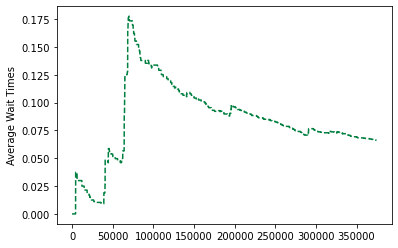

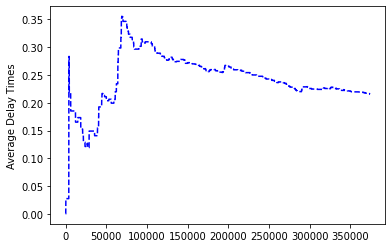

In [64]:
obj = Simulation()
obj.data_val()
obj.visulising()
